In [ ]:
import warnings;
warnings.simplefilter('ignore')

In [ ]:
#NotebookApp.iopub_data_rate_limit=1.0e10

# 0. Install and Import Dependencies

In [ ]:
!pip install Cython

In [ ]:
!pip install psycopg2

In [ ]:
!pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.0 MB/s eta 0:00:00


In [ ]:
!pip install holidays

In [ ]:
!pip install Cmake

In [ ]:
!pip install wheel

In [ ]:
!pip install attrdict3

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet

# 1. Read in Data and Process Dates

In [ ]:
df = pd.read_csv('sample_data/dataset.csv')

In [ ]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [ ]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [ ]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# 2. Train Model

In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpiw3fomky/zr79tdck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiw3fomky/f81uhj9w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40909', 'data', 'file=/tmp/tmpiw3fomky/zr79tdck.json', 'init=/tmp/tmpiw3fomky/f81uhj9w.json', 'output', 'file=/tmp/tmpiw3fomky/prophet_modelg9frgigu/prophet_model-20230711201036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:10:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:10:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# 3. Forecast Away

In [ ]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.561512,670.926842,3963.950858,3042.561512,3042.561512,-638.399466,-638.399466,-638.399466,471.949669,...,16.625235,16.625235,16.625235,-1126.974369,-1126.974369,-1126.974369,0.0,0.0,0.0,2404.162046
1,2018-01-02,3043.293094,778.018810,3831.585325,3043.293094,3043.293094,-648.583698,-648.583698,-648.583698,471.949669,...,-11.279246,-11.279246,-11.279246,-1109.254121,-1109.254121,-1109.254121,0.0,0.0,0.0,2394.709396
2,2018-01-03,3044.024676,810.046540,4078.099201,3044.024676,3044.024676,-622.804684,-622.804684,-622.804684,471.949669,...,-4.408750,-4.408750,-4.408750,-1090.345602,-1090.345602,-1090.345602,0.0,0.0,0.0,2421.219992
3,2018-01-04,3044.756258,877.764385,4051.299484,3044.756258,3044.756258,-575.884282,-575.884282,-575.884282,471.949669,...,22.490694,22.490694,22.490694,-1070.324645,-1070.324645,-1070.324645,0.0,0.0,0.0,2468.871975
4,2018-01-05,3045.487839,824.800518,4107.725240,3045.487839,3045.487839,-611.942497,-611.942497,-611.942497,471.949669,...,-34.572281,-34.572281,-34.572281,-1049.319885,-1049.319885,-1049.319885,0.0,0.0,0.0,2433.545342


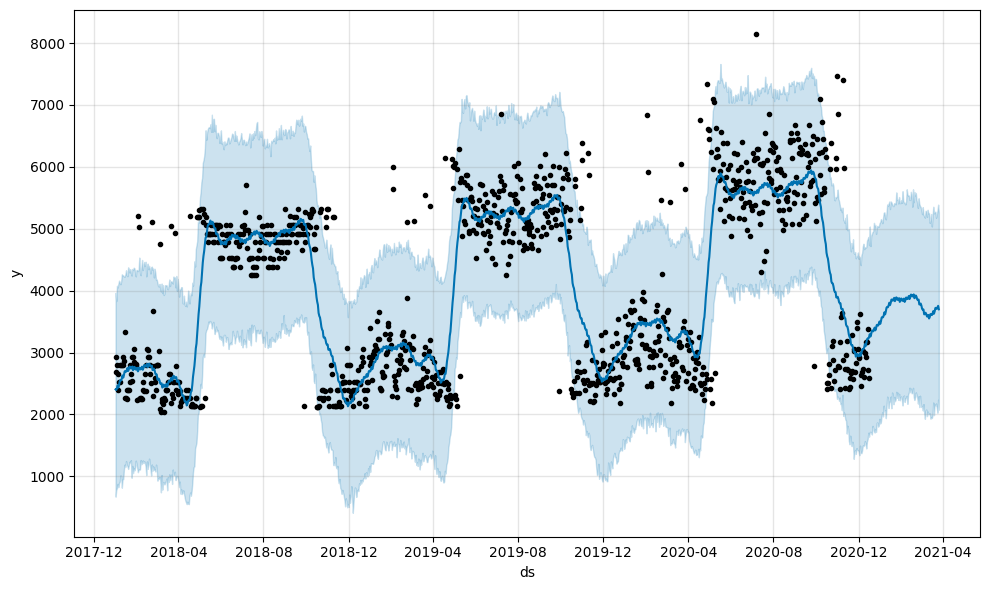

In [ ]:
plot1 = m.plot(forecast)

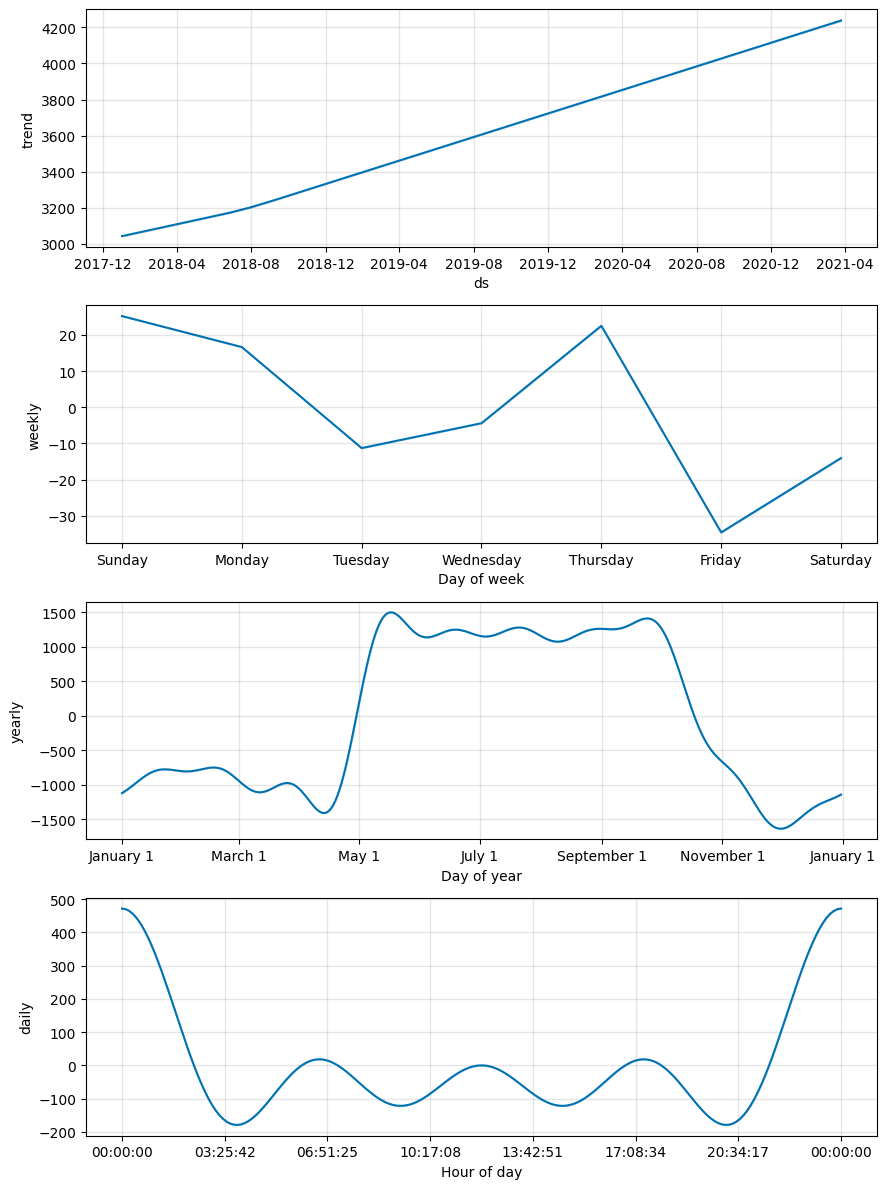

In [ ]:
plt2 = m.plot_components(forecast)